In [141]:
import requests
import pandas as pd
import numpy as np
import datetime
import json
import pandas as pd
import urllib.parse
from bloomberg import api_key
import matplotlib.pyplot as plt


In [142]:
def extract_ticks(interval="y5"):
    url = "https://bloomberg-market-and-financial-news.p.rapidapi.com/market/get-chart"
    querystring = {"interval":interval,"id":"gmg:au,scg:au,dxs:au,sgp:au,mgr:au,llc:au,gpt:au,vcx:au,chc:au,goz:au"}
        
    headers = {
            'x-rapidapi-host': "bloomberg-market-and-financial-news.p.rapidapi.com",
            'x-rapidapi-key': api_key
            }
    
    response = requests.get(url, headers=headers, params=querystring)                     
    json_d = response.json()
    return json_d

json_d = extract_ticks()

In [143]:
with open("tenstocks.json","w") as fp:
    json.dump(json_d,fp)

In [144]:
with open("tenstocks.json","r") as fp:
    json_d = json.load(fp)
        
gmg = json_d['result']['gmg:au']['ticks']
scg = json_d['result']['scg:au']['ticks']
dxs = json_d['result']['dxs:au']['ticks']
sgp = json_d['result']['sgp:au']['ticks']
mgr = json_d['result']['mgr:au']['ticks']
llc = json_d['result']['llc:au']['ticks']
gpt = json_d['result']['gpt:au']['ticks']
vcx = json_d['result']['vcx:au']['ticks']
chc = json_d['result']['chc:au']['ticks']
goz = json_d['result']['goz:au']['ticks']


gmg_df = pd.DataFrame(gmg)
gmg_df['GMG'] = gmg_df['close']
gmg_df['GMG Vol'] = gmg_df['volume']

scg_df = pd.DataFrame(scg)
scg_df['SCG'] = scg_df['close']
scg_df['SCG Vol'] = scg_df['volume']

dxs_df = pd.DataFrame(dxs)
dxs_df['DXS'] = dxs_df['close']
dxs_df['DXS Vol'] = dxs_df['volume']

sgp_df = pd.DataFrame(sgp)
sgp_df['SGP'] = sgp_df['close']
sgp_df['SGP Vol'] = sgp_df['volume']

mgr_df = pd.DataFrame(mgr)
mgr_df['MGR'] = mgr_df['close']
mgr_df['MGR Vol'] = mgr_df['volume']

llc_df = pd.DataFrame(llc)
llc_df['LLC'] = llc_df['close']
llc_df['LLC Vol'] = llc_df['volume']

gpt_df = pd.DataFrame(gpt)
gpt_df['GPT'] = gpt_df['close']
gpt_df['GPT Vol'] = gpt_df['volume']

vcx_df = pd.DataFrame(vcx)
vcx_df['VXS'] = vcx_df['close']
vcx_df['VXS Vol'] = vcx_df['volume']

chc_df = pd.DataFrame(chc)
chc_df['CHC'] = chc_df['close']
chc_df['CHC Vol'] = chc_df['volume']

goz_df = pd.DataFrame(goz)
goz_df['GOZ'] = goz_df['close']
goz_df['GOZ Vol'] = goz_df['volume']

frames = [gmg_df, scg_df, dxs_df, sgp_df, mgr_df, llc_df, gpt_df, vcx_df, chc_df,goz_df ]
result = pd.concat(frames, axis=1, sort=False)

result = result.drop(['volume','close'],axis=1)
result = result.loc[:, ~result.columns.duplicated()]
result['Date'] = result['time'].apply(lambda x:datetime.datetime.fromtimestamp(x))

result = result.set_index('time')
result = result.sort_index(ascending=True, axis=0)
result

,GMG,GMG Vol,SCG,SCG Vol,DXS,DXS Vol,SGP,SGP Vol,MGR,MGR Vol,...,LLC Vol,GPT,GPT Vol,VXS,VXS Vol,CHC,CHC Vol,GOZ,GOZ Vol,Date
time,,,,,,,,,,,,,,,,,,,,,
1445605200,6.00,22073239,4.12,65233572,7.73,15866070,3.96,41188514,1.790,65289164,...,16458705,4.74,31225070,2.90,58178989,4.43,9182663,3.093,3478726,2015-10-23 21:00:00
1446210000,6.07,13396061,4.14,88167140,7.74,11668373,4.05,75376440,1.805,56558788,...,15776310,4.77,19887215,2.91,52891323,4.49,3998722,3.073,1202184,2015-10-30 21:00:00
1446818400,6.15,29056460,4.09,73123651,7.73,13635353,4.03,53990823,1.805,74759458,...,14411594,4.70,27329132,2.93,47224882,4.53,5372130,3.073,1351930,2015-11-06 22:00:00
1447423200,5.85,29807433,3.91,76729685,7.45,17517388,3.84,41526588,1.790,119757349,...,14841403,4.59,31181604,2.72,80831321,4.42,7090681,2.973,2013785,2015-11-13 22:00:00
1448028000,6.17,21073001,4.10,63156691,7.73,22708071,3.99,46353485,1.880,165828156,...,12316285,4.70,30512485,2.83,72314221,4.53,8728733,3.083,3110651,2015-11-20 22:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600434000,18.13,35738921,2.27,190023762,9.02,29869540,3.64,68651666,2.110,130503619,...,16512666,3.95,47034254,1.43,122563455,12.36,11733659,3.350,4746961,2020-09-18 21:00:00
1601038800,18.24,32210478,2.20,143321680,9.07,30043172,3.71,74167980,2.210,120143837,...,13753819,3.97,59080353,1.40,102791740,12.37,11900779,3.440,4305698,2020-09-25 21:00:00
1601643600,18.12,22722505,2.21,112787761,9.12,23539573,3.88,62609408,2.240,100414851,...,11851270,4.03,44741116,1.39,116200328,12.88,8855988,3.400,4900227,2020-10-02 21:00:00


In [145]:
# Organise rows by including only the last value of each quarter in our data set
q_result = result.groupby(pd.PeriodIndex(result['Date'],freq="Q")).max()
q_result.index.name = 'Quarter'

quarter_select = q_result[q_result.index <= '2018Q2'].index
q_result.drop(quarter_select, inplace = True)
q_result

,GMG,GMG Vol,SCG,SCG Vol,DXS,DXS Vol,SGP,SGP Vol,MGR,MGR Vol,...,LLC Vol,GPT,GPT Vol,VXS,VXS Vol,CHC,CHC Vol,GOZ,GOZ Vol,Date
Quarter,,,,,,,,,,,,,,,,,,,,,
2018Q3,10.72,35476929,4.47,93890468,10.75,26887063,4.31,51661654,2.46,93333428,...,11890057,5.34,53151055,2.78,81445341,7.17,10313607,3.901,6369215,2018-09-28 21:00:00
2018Q4,10.97,40068466,4.16,108348774,11.09,35192124,4.11,68352303,2.34,131399407,...,60123486,5.55,62897849,2.76,101913730,7.55,17049612,3.800,5768882,2018-12-28 22:00:00
2019Q1,13.39,70101375,4.11,111055466,12.74,39944038,3.88,77082076,2.75,105086598,...,33709030,6.21,50294836,2.65,139930562,10.27,14697936,4.150,7431647,2019-03-29 21:00:00
2019Q2,15.08,31608564,3.96,161321082,13.64,48257591,4.49,117278041,3.21,156737890,...,21411295,6.27,93223879,2.68,127060086,11.52,17372180,4.350,7276832,2019-06-28 21:00:00
2019Q3,16.07,151540522,4.13,142984078,13.90,31416417,4.70,83329784,3.33,103404641,...,35552236,6.49,66468116,2.69,82790690,12.65,24978072,4.470,9739548,2019-09-27 21:00:00
2019Q4,14.82,38060440,3.98,334235889,12.23,32783308,5.05,63641655,3.37,98318676,...,18666018,6.32,56562399,2.69,74636064,11.84,15754556,4.400,10997246,2019-12-27 22:00:00
2020Q1,16.44,85735875,4.03,365094044,13.23,73429975,5.32,174111365,3.48,249064894,...,26181601,6.24,114131068,2.56,224668714,13.87,35912861,4.440,19781138,2020-03-27 21:00:00
2020Q2,15.37,46042071,2.51,260790271,10.05,61634523,3.96,131894251,2.49,174480803,...,36030881,4.47,107856545,1.74,342552844,10.10,21975378,3.420,14418973,2020-06-26 21:00:00
2020Q3,18.41,39023744,2.27,226613765,9.46,36639084,3.90,82621643,2.29,133108680,...,16512666,4.41,59080353,1.45,173745503,12.51,13039054,3.440,9905968,2020-09-25 21:00:00


In [146]:
# Split our data frame into two dataframes containing Stock price and stock value
stock_price = q_result[['GMG', 'SCG','DXS','SGP','MGR','LLC','GPT', 'VXS', 'CHC', 'GOZ']]
stock_vol = q_result[['GMG Vol', 'SCG Vol','DXS Vol','SGP Vol','MGR Vol','LLC Vol','GPT Vol', 'VXS Vol', 'CHC Vol', 'GOZ Vol']]

In [172]:
# based on stock price data frame create a table that holds the % change in share price and volume of trades 
# price_change is a great indicator of company valuation
# vol_change is a great indication of each asset's liquidity
price_change = (stock_price.pct_change(1) * 100)
vol_change = (stock_vol.pct_change(1) * 100)
# Define the mean of % changes in price change and volume of trades
price_change['Avg'] = price_change.mean(axis=1)
vol_change['Avg Vol'] = vol_change.mean(axis=1)


In [173]:
 # Once the change values were calculated we are only interested in 2018Q4, so we drop 2018Q3 row   
drop_q3 = price_change[price_change.index <= '2018Q3'].index
price_change.drop(drop_q3, inplace = True)

drop_q3 = vol_change[vol_change.index <= '2018Q3'].index
vol_change.drop(drop_q3, inplace = True)

# The style format function will reduce our data to 2 decimal points in a % format
#prc_pct_change = price_change.style.format("{:.2f}%")
#vol_pct_change = vol_change.style.format("{:.2f}%")


In [174]:
# price_change is a great indicator of company valuation

pd.options.display.float_format = '{:.2f}%'.format
price_change

,GMG,SCG,DXS,SGP,MGR,LLC,GPT,VXS,CHC,GOZ,Avg
Quarter,,,,,,,,,,,
2018Q4,2.33%,-6.94%,3.16%,-4.64%,-4.88%,-11.34%,3.93%,-0.72%,5.30%,-2.59%,-1.64%
2019Q1,22.06%,-1.20%,14.88%,-5.60%,17.52%,-24.08%,11.89%,-3.99%,36.03%,9.21%,7.67%
2019Q2,12.62%,-3.65%,7.06%,15.72%,16.73%,0.92%,0.97%,1.13%,12.17%,4.82%,6.85%
2019Q3,6.56%,4.29%,1.91%,4.68%,3.74%,24.79%,3.51%,0.37%,9.81%,2.76%,6.24%
2019Q4,-7.78%,-3.63%,-12.01%,7.45%,1.20%,9.57%,-2.62%,0.00%,-6.40%,-1.57%,-1.58%
2020Q1,10.93%,1.26%,8.18%,5.35%,3.26%,-1.53%,-1.27%,-4.83%,17.15%,0.91%,3.94%
2020Q2,-6.51%,-37.72%,-24.04%,-25.56%,-28.45%,-32.31%,-28.37%,-32.03%,-27.18%,-22.97%,-26.51%
2020Q3,19.78%,-9.56%,-5.87%,-1.52%,-8.03%,-2.68%,-1.34%,-16.67%,23.86%,0.58%,-0.14%
2020Q4,3.80%,1.32%,-3.28%,5.13%,-1.31%,-2.44%,-6.58%,-1.38%,7.35%,1.16%,0.38%


In [175]:
# vol_change is a great indication of each asset's liquidity
#
vol_change

,GMG Vol,SCG Vol,DXS Vol,SGP Vol,MGR Vol,LLC Vol,GPT Vol,VXS Vol,CHC Vol,GOZ Vol,Avg Vol
Quarter,,,,,,,,,,,
2018Q4,12.94%,15.40%,30.89%,32.31%,40.78%,405.66%,18.34%,25.13%,65.31%,-9.43%,63.73%
2019Q1,74.95%,2.50%,13.50%,12.77%,-20.03%,-43.93%,-20.04%,37.30%,-13.79%,28.82%,7.21%
2019Q2,-54.91%,45.26%,20.81%,52.15%,49.15%,-36.48%,85.35%,-9.20%,18.19%,-2.08%,16.82%
2019Q3,379.43%,-11.37%,-34.90%,-28.95%,-34.03%,66.04%,-28.70%,-34.84%,43.78%,33.84%,35.03%
2019Q4,-74.88%,133.76%,4.35%,-23.63%,-4.92%,-47.50%,-14.90%,-9.85%,-36.93%,12.91%,-6.16%
2020Q1,125.26%,9.23%,123.99%,173.58%,153.32%,40.26%,101.78%,201.02%,127.95%,79.87%,113.63%
2020Q2,-46.30%,-28.57%,-16.06%,-24.25%,-29.95%,37.62%,-5.50%,52.47%,-38.81%,-27.11%,-12.64%
2020Q3,-15.24%,-13.10%,-40.55%,-37.36%,-23.71%,-54.17%,-45.22%,-49.28%,-40.67%,-31.30%,-35.06%
2020Q4,-37.56%,-50.23%,-35.75%,-24.22%,-24.56%,-25.70%,-24.27%,-33.12%,-32.08%,-49.18%,-33.67%


In [176]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
import numpy as np



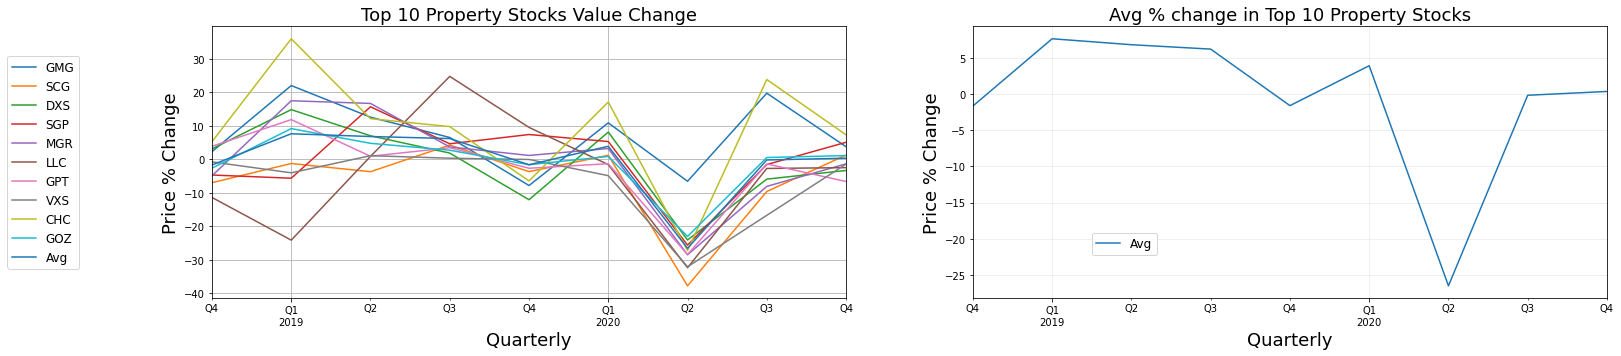

In [180]:

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize =(25,5))

labels = ['2018 Q4','2019 Q1','2019 Q2','2019 Q3','2019 Q4','2020 Q1','2020 Q2']


top10_linechart_df = price_change.iloc[:, 0:11] 
avg_linechart_df = price_change.iloc[:, 10:11]
x = range(len(labels))

top10_linechart_df.plot(ax=ax1, grid=True)
ax1.set_xlabel('Quarterly', fontsize=18)
ax1.set_ylabel('Price % Change', fontsize=18)
ax1.set_title('Top 10 Property Stocks Value Change', fontsize=18)
ax1.legend(loc=5, fontsize = 12,bbox_to_anchor=(-.2,.5))

plt.grid(alpha=0.25)
#ax1.set_xticks(x)
#ax1.set_xticklabels(labels, rotation = 90)



avg_linechart_df.plot(ax=ax2)
ax2.set_xlabel('Quarterly', fontsize=18)
ax2.set_ylabel('Price % Change', fontsize=18)
ax2.set_title('Avg % change in Top 10 Property Stocks', fontsize=18)
ax2.legend(loc=5, fontsize = 12,bbox_to_anchor=(.3,.2))

#ax2.set_xticks(x)
#ax2.set_xticklabels(labels)
plt.grid(alpha=0.25)
#top10_linechart_df.plot(ax=ax2)




plt.savefig('top 10.png', bbox_inches='tight')


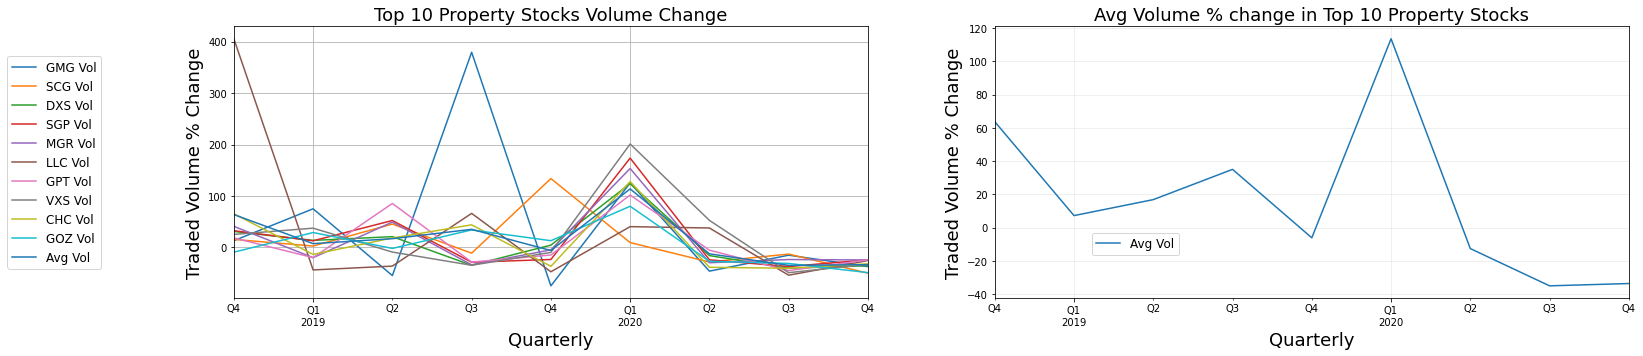

In [181]:


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize =(25,5))

labels = ['2018 Q4','2019 Q1','2019 Q2','2019 Q3','2019 Q4','2020 Q1','2020 Q2']


top10vol_linechart_df = vol_change.iloc[:, 0:11] 
avgvol_linechart_df = vol_change.iloc[:, 10:11]

x = range(len(labels))

top10vol_linechart_df.plot(ax=ax1, grid=True)
ax1.set_xlabel('Quarterly', fontsize=18)
ax1.set_ylabel('Traded Volume % Change', fontsize=18)
ax1.set_title('Top 10 Property Stocks Volume Change', fontsize=18)
ax1.legend(loc=5, fontsize = 12,bbox_to_anchor=(-.2,.5))

plt.grid(alpha=0.25)
#ax1.set_xticks(x)
#ax1.set_xticklabels(labels, rotation = 90)



avgvol_linechart_df.plot(ax=ax2)
ax2.set_xlabel('Quarterly', fontsize=18)
ax2.set_ylabel('Traded Volume % Change', fontsize=18)
ax2.set_title('Avg Volume % change in Top 10 Property Stocks', fontsize=18)
ax2.legend(loc=5, fontsize = 12,bbox_to_anchor=(.3,.2))

#ax2.set_xticks(x)
#ax2.set_xticklabels(labels)
plt.grid(alpha=0.25)
#top10_linechart_df.plot(ax=ax2)




plt.savefig('top 10vol.png', bbox_inches='tight')

In [44]:
import csv
pd.options.display.float_format = '{:.2f}%'.format

price_change
vol_change

,GMG Vol,SCG Vol,DXS Vol,SGP Vol,MGR Vol,LLC Vol,GPT Vol,VXS Vol,CHC Vol,GOZ Vol,Avg
Quarter,,,,,,,,,,,
2018Q4,12.94%,15.40%,30.89%,32.31%,40.78%,405.66%,18.34%,25.13%,65.31%,-9.43%,63.73%
2019Q1,74.95%,2.50%,13.50%,12.77%,-20.03%,-43.93%,-20.04%,37.30%,-13.79%,28.82%,7.21%
2019Q2,-54.91%,45.26%,20.81%,52.15%,49.15%,-36.48%,85.35%,-9.20%,18.19%,-2.08%,16.82%
2019Q3,379.43%,-11.37%,-34.90%,-28.95%,-34.03%,66.04%,-28.70%,-34.84%,43.78%,33.84%,35.03%
2019Q4,-74.88%,133.76%,4.35%,-23.63%,-4.92%,-47.50%,-14.90%,-9.85%,-36.93%,12.91%,-6.16%
2020Q1,125.26%,9.23%,123.99%,173.58%,153.32%,40.26%,101.78%,201.02%,127.95%,79.87%,113.63%
2020Q2,-46.30%,-28.57%,-16.06%,-24.25%,-29.95%,37.62%,-5.50%,52.47%,-38.81%,-27.11%,-12.64%
2020Q3,-15.24%,-13.10%,-40.55%,-37.36%,-23.71%,-54.17%,-45.22%,-49.28%,-40.67%,-31.30%,-35.06%
2020Q4,-37.56%,-50.23%,-35.75%,-24.22%,-24.56%,-25.70%,-24.27%,-33.12%,-32.08%,-49.18%,-33.67%


In [46]:
print('DataFrame:\n', price_change) 
price_change_csv = price_change.to_csv('price_change.csv', index = False) 
print('\nCSV String:\n', price_change_csv) 

print('DataFrame:\n', vol_change) 
vol_change_csv = vol_change.to_csv('vol_change.csv', index = False) 
print('\nCSV String:\n', vol_change_csv)

DataFrame:
            GMG     SCG     DXS     SGP     MGR     LLC     GPT     VXS  \
Quarter                                                                  
2018Q4   2.33%  -6.94%   3.16%  -4.64%  -4.88% -11.34%   3.93%  -0.72%   
2019Q1  22.06%  -1.20%  14.88%  -5.60%  17.52% -24.08%  11.89%  -3.99%   
2019Q2  12.62%  -3.65%   7.06%  15.72%  16.73%   0.92%   0.97%   1.13%   
2019Q3   6.56%   4.29%   1.91%   4.68%   3.74%  24.79%   3.51%   0.37%   
2019Q4  -7.78%  -3.63% -12.01%   7.45%   1.20%   9.57%  -2.62%   0.00%   
2020Q1  10.93%   1.26%   8.18%   5.35%   3.26%  -1.53%  -1.27%  -4.83%   
2020Q2  -6.51% -37.72% -24.04% -25.56% -28.45% -32.31% -28.37% -32.03%   
2020Q3  19.78%  -9.56%  -5.87%  -1.52%  -8.03%  -2.68%  -1.34% -16.67%   
2020Q4   3.80%   1.32%  -3.28%   5.13%  -1.31%  -2.44%  -6.58%  -1.38%   

            CHC     GOZ     Avg  
Quarter                          
2018Q4    5.30%  -2.59%  -1.64%  
2019Q1   36.03%   9.21%   7.67%  
2019Q2   12.17%   4.82%   6.85%  
201